<a href="https://colab.research.google.com/github/adibmuflih/Adib-Muflih-/blob/main/Tugas%2013%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grafik 1 - FREKUENSI 1800 Mhz

In [14]:
import numpy as np
import matplotlib.pyplot as plt


In [15]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [16]:
f=1800 #MHz
loc='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [17]:
print(d)

[437 452 391 311 424 641 597 588 480 534 648 393 414 323 432 247 305 665
 641 452 345 295 531 237 695 657 392 423 397 650 236 657 362 621 235 252
 639 228 465 436 579 221 510 472 487 409 517 223 459 401 321 573 601 288
 585 278 615 618 473 547 521 235 332 345 593 509 684 422 519 517 550 570
 243 379 323 503 410 223 465 698 570 574 414 637 239 628 268 337 520 696
 326 392 306 642 443 268 562 390 512 235 546 575 622 468 675 650 205 333
 431 295 297 278 465 227 386 400 306 469 358 664 400 612 595 506 229 333
 647 418 559 368 450 629 590 277 296 343 629 660 595 273 597 524 322 574
 600 439 212 279 350 533 573 386 661 636 471 570 387 478 355 647 248 343
 249 540 552 306 439 560 651 399 554 423 634 299 343 689 503 346 661 497
 284 424 404 521 676 665 316 278 318 222 685 403 241 588 659 658 235 514
 341 664]


In [18]:
LpUrban=cos(f,loc,tower,user,d)
LpSuburban=cos(f,loc2,tower,user,d)
LpOpen=cos(f,loc3,tower,user,d)

In [19]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

# Gambar Kurva

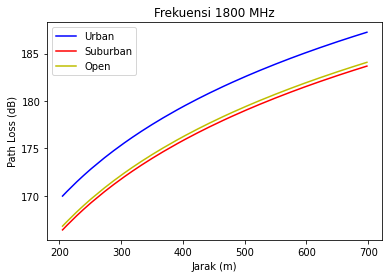

In [20]:
plt.figure()
plt.plot(d_sort,Urban_sort,'b-', label='Urban')
plt.plot(d_sort,Suburban_sort,'r-', label='Suburban')
plt.plot(d_sort,Open_sort,'y-', label='Open')
plt.legend()
plt.title('Frekuensi 1800 MHz')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()


# Grafik 2 - Model Urban

In [21]:
f=700 #MHz
f2=900 #MHz
f3=1800 #MHz
loc='urban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [22]:
LpUrban=cos(f,loc,tower,user,d)
LpUrban2=cos(f2,loc,tower,user,d)
LpUrban3=cos(f3,loc,tower,user,d)

In [23]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Urban2_sort=LpUrban2[np.argsort(d)]
Urban3_sort=LpUrban3[np.argsort(d)]

# Gambar Kurva 

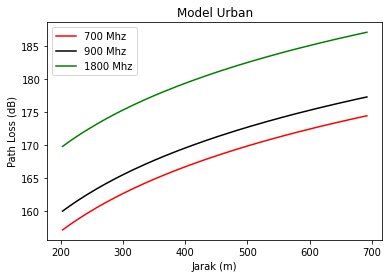

In [24]:
plt.figure()
plt.plot(d_sort,Urban_sort,'r-', label='700 Mhz')
plt.plot(d_sort,Urban2_sort,'k-', label='900 Mhz')
plt.plot(d_sort,Urban3_sort,'g-', label='1800 Mhz')
plt.legend()
plt.title('Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()
